In [1]:
from surfplot import Plot
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import os
from utils import get_annot_labels
from utils import rois2maps
from neuromaps.datasets import fetch_fsaverage 

In [20]:
base_path = os.path.dirname(os.getcwd())

dat = pd.read_csv(base_path + '/data/jessen/jessen_cohend.csv')

# make maps to plt
lh_dat = dat.loc[dat['parcel'].str.contains('L_'),:]
lh_dat.loc[:,'cohen_d'] = lh_dat['cohen_d'] + 0.001 # weird 
rh_dat = dat.loc[dat['parcel'].str.contains('R_'),:]

In [3]:
# get labels 
lh_labels = get_annot_labels('lh.aparc.annot')    
rh_labels = get_annot_labels('rh.aparc.annot')

In [22]:
#  cohen_d = ( ( SZ_mean_6weeks- SZ_mean_base)/ sqrt( (SZ_SD_base^2 + SZ_SD_6weeks^2)/2))
# positive values mean that region is thicker after 6 weeks, negative values mean the region is thinner 
pmap = rois2maps(lh_dat, rh_dat, 'cohen_d', lh_labels, rh_labels)


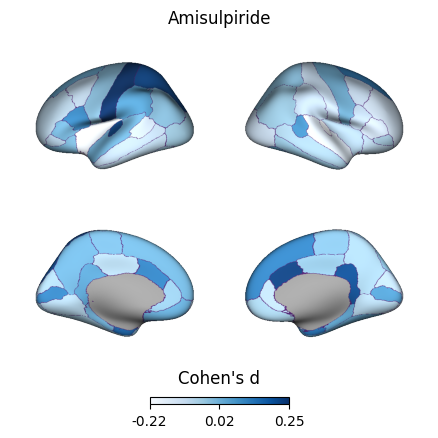

In [25]:
# plot 
surface = fetch_fsaverage(density='164k')
lh, rh = surface['inflated']
dk = {'left': np.array(lh_labels), 'right': np.array(rh_labels)} # outlines 

p = Plot(lh, rh, views=['lateral', 'medial'], zoom=1.2)
p.add_layer(pmap, cmap='Blues', cbar_label="Cohen's d")
p.add_layer(dk, as_outline=True, cbar=False)
  
pic = p.build()

# fix legend 
cbar_ax = pic.axes[-1]
cbar_ax.set_ylabel('')
cbar_ax.set_title("Cohen's d", pad=10);
plt.title('Amisulpiride')
pic.savefig(os.path.join(base_path + '/figs/AMI_parcelwise_cohen_d.jpg'), dpi=300, transparent=True)
